In [7]:
import networkx as nx
import csv
import random

In [8]:
import numpy as np
import loadNetwork
import localassort
from matplotlib import pyplot as plt

# %matplotlib inline

In [9]:
def convert_gml_multiscaling_format(G, edgelist_name, label_name, null_label_name):
    # relabel node
    H = nx.convert_node_labels_to_integers(G,label_attribute='ins_id')
    # write to edgelist
    nx.write_edgelist(H, edgelist_name, data=False)
    # write label
    gender_preference_dict = nx.get_node_attributes(H, "genderNeutral")
    with open(label_name, 'w') as csvfile:
        for value in list(gender_preference_dict.values()):
            csvfile.write(str(value) + '\n')
    with open(null_label_name, 'w') as csvfile:
        values = list(gender_preference_dict.values())
        random.shuffle(values)
        for value in values:
            csvfile.write(str(value) + '\n')

### Full Graph

In [10]:
G = nx.read_gml("../../../results/threshold_0.6_filter_True/data/year_1990/full_asso_bf10.gml")
gender_preference_dict = nx.get_node_attributes(G, "genderNeutral")

In [11]:
convert_gml_multiscaling_format(G.copy(), 
                                "network_data/art_gender.edgelist", 
                                'network_data/art_gender_label.txt', 
                                'network_data/art_gender_label_null.txt')

In [12]:
# get a subgraph excluding neutral nodes
not_genderNeutral = [node for node in gender_preference_dict if gender_preference_dict[node]!=0]
not_genderNeutral_preference_dict = {node: gender_preference_dict[node] - 1 for node in not_genderNeutral}
G_noNeutral = G.subgraph(not_genderNeutral)
nx.set_node_attributes(G_noNeutral, name="genderNeutral", values=not_genderNeutral_preference_dict)
convert_gml_multiscaling_format(G_noNeutral, 
                                "network_data/art_gender_noNeutral.edgelist", 
                                'network_data/art_gender_label_noNeutral.txt', 
                                'network_data/art_gender_label_noNeutral_null.txt')

In [13]:
# get a subgraph combining women with neutral
womenCombined_preference_dict = {node: gender_preference_dict[node] if gender_preference_dict[node]!=2 else 0 
                                 for node in gender_preference_dict}
G_womenCombined = G.copy()
nx.set_node_attributes(G_womenCombined, name="genderNeutral", values=womenCombined_preference_dict)
convert_gml_multiscaling_format(G_womenCombined, 
                                "network_data/art_gender_womenCombined.edgelist", 
                                'network_data/art_gender_label_womenCombined.txt', 
                                'network_data/art_gender_label_womenCombined_null.txt')

In [14]:
# get a subgraph combining men with neutral
menCombined_preference_dict = {}
for node in gender_preference_dict:
    if gender_preference_dict[node] == 1:
        menCombined_preference_dict[node] = 0
    elif gender_preference_dict[node] == 2:
        menCombined_preference_dict[node] = 1
    else:
        menCombined_preference_dict[node] = 0
G_menCombined = G.copy()
nx.set_node_attributes(G_menCombined, name="genderNeutral", values=menCombined_preference_dict)
convert_gml_multiscaling_format(G_menCombined, 
                                "network_data/art_gender_menCombined.edgelist", 
                                'network_data/art_gender_label_menCombined.txt', 
                                'network_data/art_gender_label_menCombined_null.txt')

### Filtered Graph

In [15]:
G_filtered = nx.read_gml("../../../results/threshold_0.6_filter_True/data/year_1990/full_asso_default_filter_bf10.gml")
gender_preference_dict = nx.get_node_attributes(G_filtered, "genderNeutral")

In [16]:
convert_gml_multiscaling_format(G_filtered.copy(), 
                                "network_data/art_gender_filtered.edgelist", 
                                'network_data/art_gender_filtered_label.txt', 
                                'network_data/art_gender_filtered_label_null.txt')

In [17]:
# get a subgraph excluding neutral nodes
not_genderNeutral = [node for node in gender_preference_dict if gender_preference_dict[node]!=0]
not_genderNeutral_preference_dict = {node: gender_preference_dict[node] - 1 for node in not_genderNeutral}
G_filtered_noNeutral = G_filtered.copy()
nx.set_node_attributes(G_filtered_noNeutral, name="genderNeutral", values=not_genderNeutral_preference_dict)
convert_gml_multiscaling_format(G_filtered_noNeutral, 
                                "network_data/art_gender_filtered_noNeutral.edgelist", 
                                'network_data/art_gender_filtered_label_noNeutral.txt', 
                                'network_data/art_gender_filtered_label_noNeutral_null.txt')

In [18]:
# get a subgraph combining women with neutral
womenCombined_preference_dict = {node: gender_preference_dict[node] if gender_preference_dict[node]!=2 else 0 
                                 for node in gender_preference_dict}
G_filtered_womenCombined = G_filtered.subgraph(womenCombined_preference_dict)
nx.set_node_attributes(G_filtered_womenCombined, name="genderNeutral", values=womenCombined_preference_dict)
convert_gml_multiscaling_format(G_filtered_womenCombined, 
                                "network_data/art_gender_filtered_womenCombined.edgelist", 
                                'network_data/art_gender_filtered_label_womenCombined.txt', 
                                'network_data/art_gender_filtered_label_womenCombined_null.txt')

In [19]:
# get a subgraph combining men with neutral
menCombined_preference_dict = {}
for node in gender_preference_dict:
    if gender_preference_dict[node] == 1:
        menCombined_preference_dict[node] = 0
    elif gender_preference_dict[node] == 2:
        menCombined_preference_dict[node] = 1
    else:
        menCombined_preference_dict[node] = 0
G_filtered_menCombined = G_filtered.copy()
nx.set_node_attributes(G_filtered_menCombined, name="genderNeutral", values=menCombined_preference_dict)
convert_gml_multiscaling_format(G_filtered_menCombined, 
                                "network_data/art_gender_filtered_menCombined.edgelist", 
                                'network_data/art_gender_filtered_label_menCombined.txt', 
                                'network_data/art_gender_filtered_label_menCombined_null.txt')

## Calculate and Plot Multi-scaling

In [20]:
def plot_multiscaling(networkfile, metadatafile, metadatafile_null, label_name, figname=None):
    E, M = loadNetwork.load(networkfile, metadatafile, zero_index=0)
    E_null, M_null = loadNetwork.load(networkfile, metadatafile_null, zero_index=0)
    assortM, assortT, Z = localassort.localAssortF(E,M,pr=np.arange(0,1,0.1))
    assortM_null, assortT_null, Z_null = localassort.localAssortF(E_null,M_null,pr=np.arange(0,1,0.1))
    
    labels = sorted(list(set(M)))
    fig, ax = plt.subplots(1, len(labels)+1, sharex=True, sharey=True, figsize=(5*(len(labels)+1), 5))
    
    plt.figure()
    ax[0].hist(assortT, bins=100, label="observed")
    ax[0].hist(assortT_null,histtype='step', bins=100, label="null")
    ax[0].set_xlabel("assortativity")
    ax[0].set_ylabel("frequency")
    ax[0].legend()
    
    # seperate each label
    for label, label_name in zip(labels, label_name):
        assortT_label = assortT[M == label]
        assortT_null_label = assortT_null[M == label]
        ax[label+1].hist(assortT_label, bins=100, label="observed")
        ax[label+1].hist(assortT_null_label,histtype='step', bins=100, label="null")
        ax[label+1].set_title(label_name)
        ax[label+1].set_xlabel("assortativity")
        ax[label+1].set_ylabel("frequency")
    plt.tight_layout()
    if figname:
        fig.savefig(figname)
    plt.show()

### Full Graph

/Users/xindiwang/Desktop/art_paper_revision_May2024/artGender/codes/SI_codes/MultiscaleMixing/localassort.py:62: RuntimeWarning: divide by zero encountered in divide
  D = sparse.diags(1./degree, 0, format='csc')
/Users/xindiwang/Desktop/art_paper_revision_May2024/artGender/codes/SI_codes/MultiscaleMixing/localassort.py:74: RuntimeWarning: invalid value encountered in divide
  Z = (W @ Z) / degree
/Users/xindiwang/Desktop/art_paper_revision_May2024/artGender/codes/SI_codes/MultiscaleMixing/localassort.py:116: RuntimeWarning: invalid value encountered in divide
  e_gh /= e_gh_sum


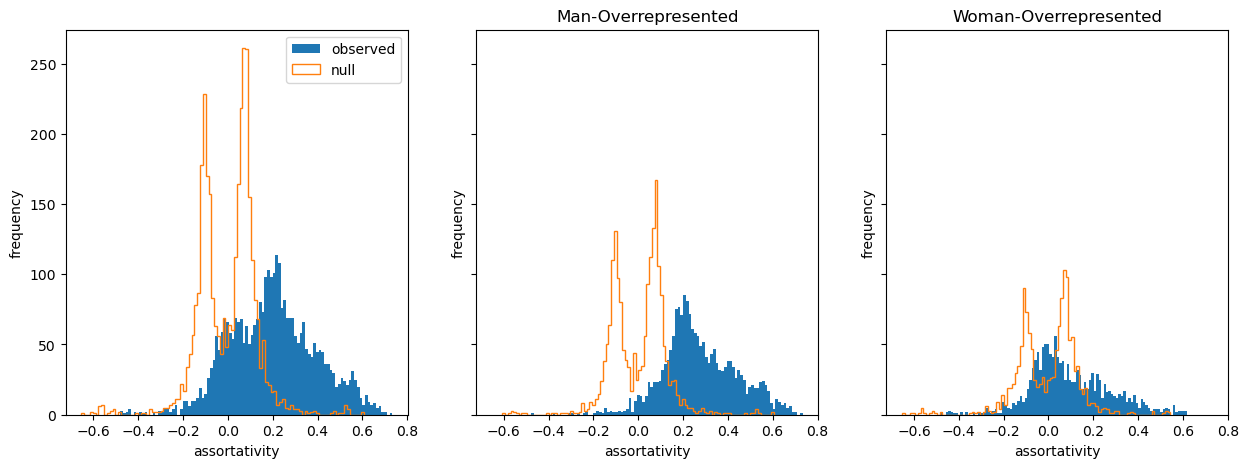

<Figure size 640x480 with 0 Axes>

In [21]:
# in SI
networkfile = "network_data/art_gender_noNeutral.edgelist" 
metadatafile ='network_data/art_gender_label_noNeutral.txt' 
metadatafile_null = 'network_data/art_gender_label_noNeutral_null.txt'
plot_multiscaling(networkfile, metadatafile, metadatafile_null, ["Man-Overrepresented", "Woman-Overrepresented"],
                 figname="../../../results/SI/fig1/fig1-d.pdf")

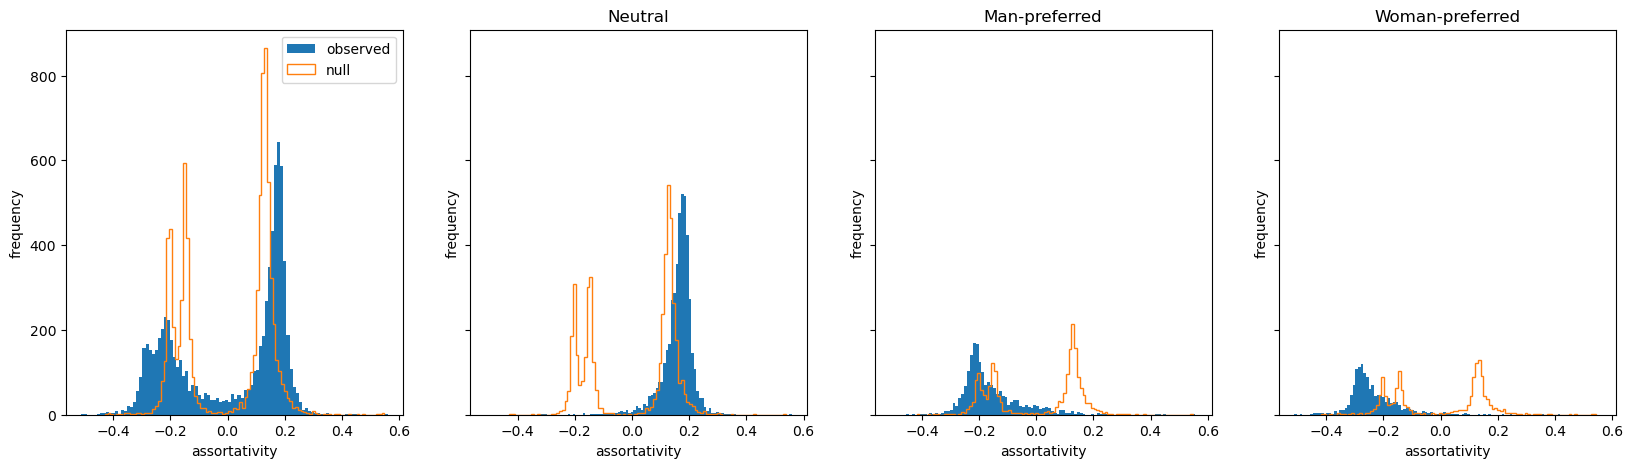

<Figure size 640x480 with 0 Axes>

In [22]:
networkfile = 'network_data/art_gender.edgelist'
metadatafile = 'network_data/art_gender_label.txt'
metadatafile_null = 'network_data/art_gender_label_null.txt'
plot_multiscaling(networkfile, metadatafile, metadatafile_null, ["Neutral", "Man-preferred", "Woman-preferred"])

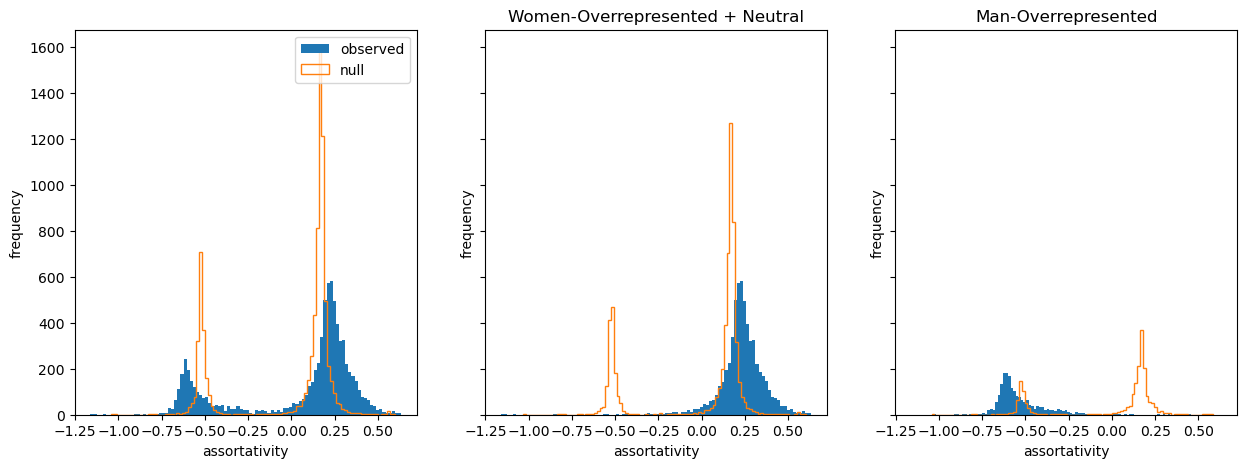

<Figure size 640x480 with 0 Axes>

In [23]:
networkfile= "network_data/art_gender_womenCombined.edgelist"
metadatafile='network_data/art_gender_label_womenCombined.txt'
metadatafile_null='network_data/art_gender_label_womenCombined_null.txt'
plot_multiscaling(networkfile, metadatafile, metadatafile_null, ["Women-Overrepresented + Neutral", "Man-Overrepresented"])

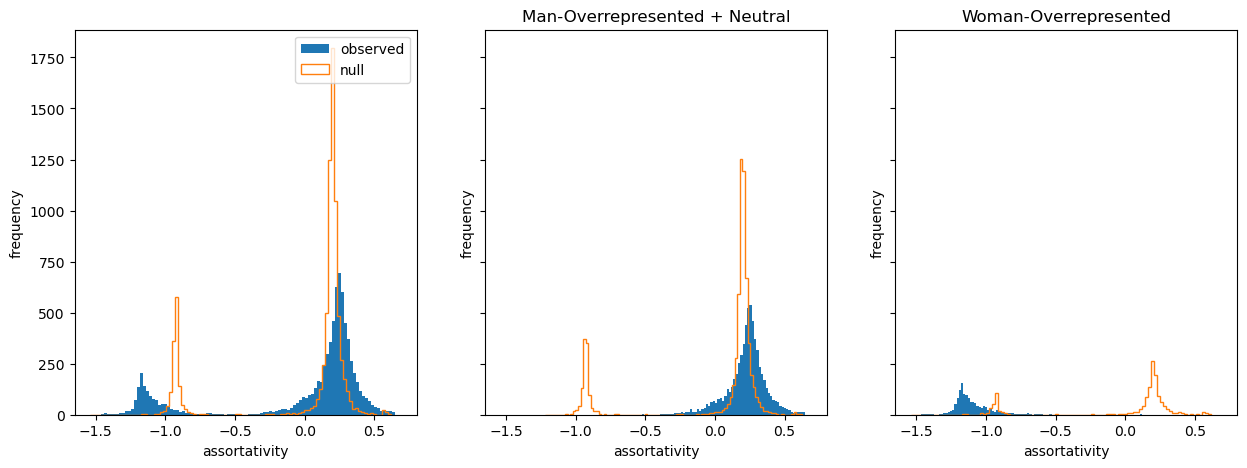

<Figure size 640x480 with 0 Axes>

In [24]:
networkfile= "network_data/art_gender_menCombined.edgelist"
metadatafile='network_data/art_gender_label_menCombined.txt'
metadatafile_null='network_data/art_gender_label_menCombined_null.txt'
plot_multiscaling(networkfile, metadatafile, metadatafile_null, ["Man-Overrepresented + Neutral", "Woman-Overrepresented"])

### Filtered Graph

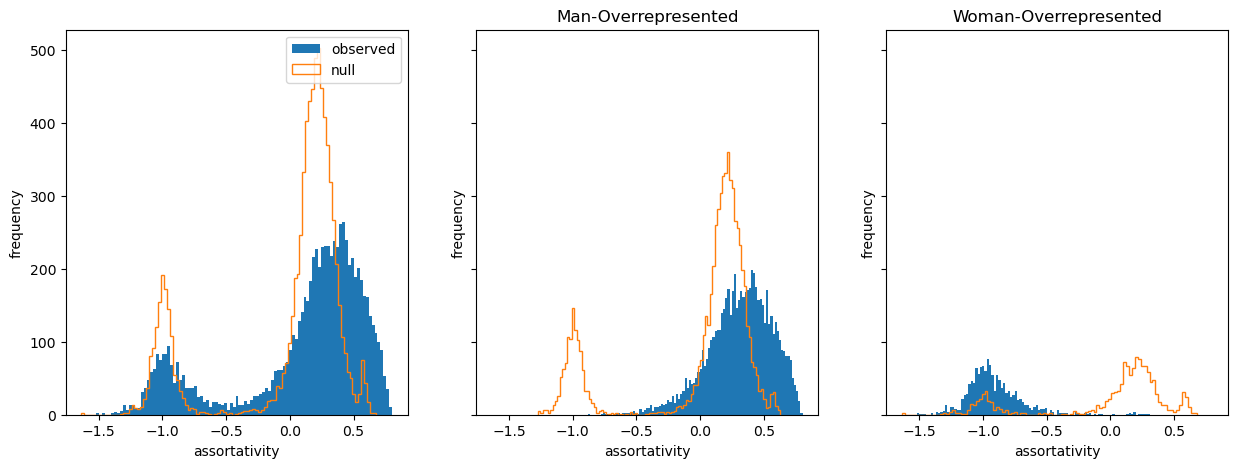

<Figure size 640x480 with 0 Axes>

In [25]:
# in SI
networkfile = 'network_data/art_gender_filtered_noNeutral.edgelist'
metadatafile = 'network_data/art_gender_filtered_label_noNeutral.txt'
metadatafile_null = 'network_data/art_gender_filtered_label_noNeutral_null.txt'
plot_multiscaling(networkfile, metadatafile, metadatafile_null,["Man-Overrepresented","Woman-Overrepresented"],
                 figname="../../../results/SI/fig1/fig1-e.pdf")

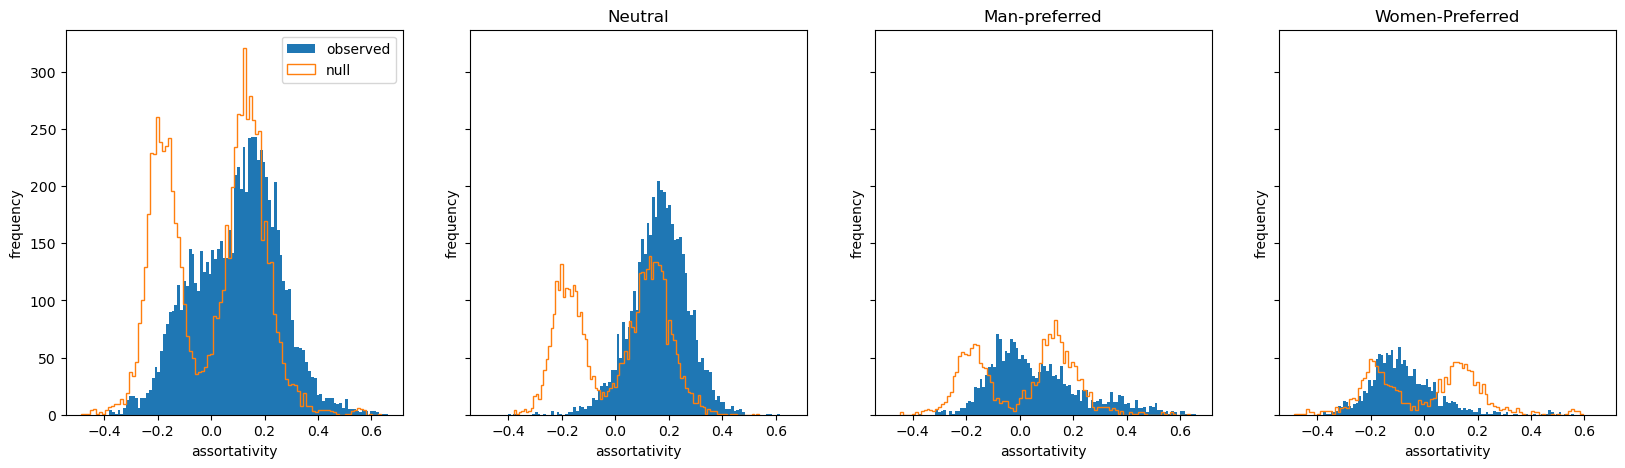

<Figure size 640x480 with 0 Axes>

In [26]:
networkfile = 'network_data/art_gender_filtered.edgelist'
metadatafile = 'network_data/art_gender_filtered_label.txt'
metadatafile_null = 'network_data/art_gender_filtered_label_null.txt'
plot_multiscaling(networkfile, metadatafile, metadatafile_null, ["Neutral", "Man-preferred","Women-Preferred"])

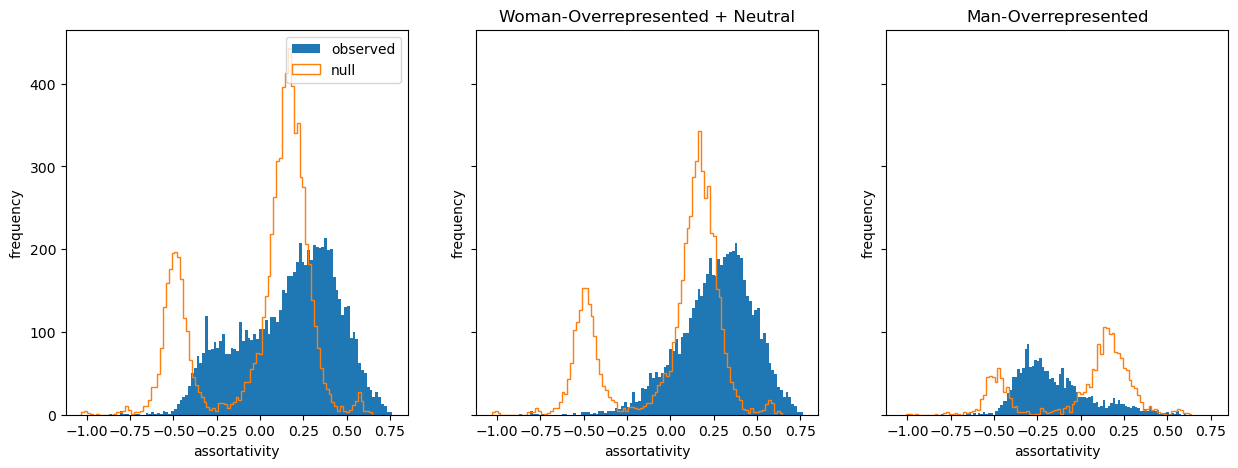

<Figure size 640x480 with 0 Axes>

In [27]:
networkfile = 'network_data/art_gender_filtered_womenCombined.edgelist'
metadatafile = 'network_data/art_gender_filtered_label_womenCombined.txt'
metadatafile_null = 'network_data/art_gender_filtered_label_womenCombined_null.txt'
plot_multiscaling(networkfile, metadatafile, metadatafile_null, ["Woman-Overrepresented + Neutral", "Man-Overrepresented"])

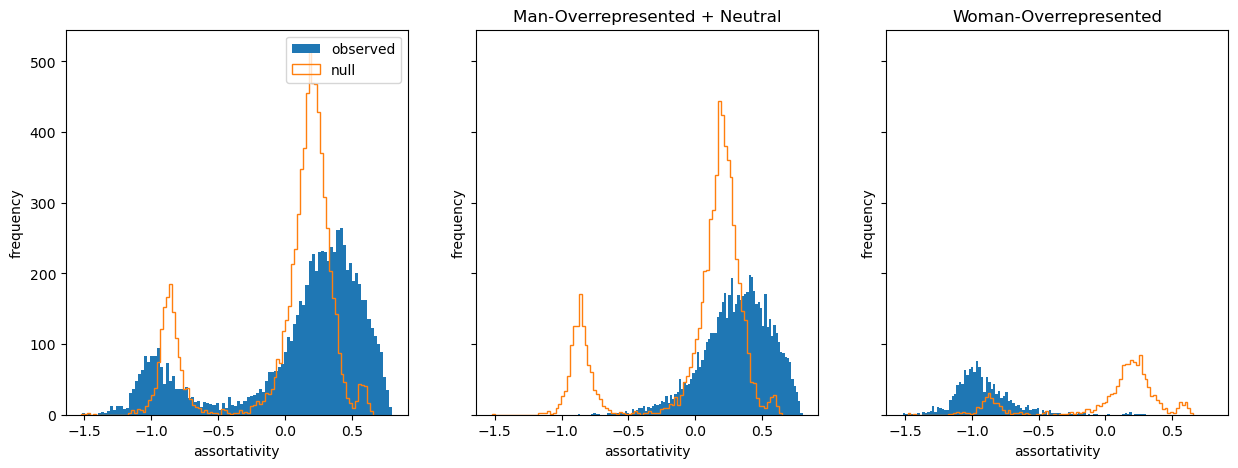

<Figure size 640x480 with 0 Axes>

In [28]:
networkfile = 'network_data/art_gender_filtered_menCombined.edgelist'
metadatafile = 'network_data/art_gender_filtered_label_menCombined.txt'
metadatafile_null = 'network_data/art_gender_filtered_label_menCombined_null.txt'
plot_multiscaling(networkfile, metadatafile, metadatafile_null, ["Man-Overrepresented + Neutral", "Woman-Overrepresented"])

## Calculate Assortativity Coefficient

In [29]:
import random

In [32]:
print("Original graph", nx.attribute_assortativity_coefficient(G, "genderNeutral"))

Original graph 0.03707745977079791


In [37]:
gender_preference_dict_ins = list(nx.get_node_attributes(G, "genderNeutral").keys())
gender_preference_dict_values = list(nx.get_node_attributes(G, "genderNeutral").values())

In [44]:
res = []
for i in range(1000):
    random.shuffle(gender_preference_dict_values)
    random_gender_preference_dict = dict(zip(gender_preference_dict_ins, gender_preference_dict_values))
    nx.set_node_attributes(G, random_gender_preference_dict, "genderNeutralRandom")
    res.append(nx.attribute_assortativity_coefficient(G, "genderNeutralRandom"))

In [45]:
import numpy as np

In [46]:
np.mean(res)

-0.0002947071261848605

In [47]:
np.std(res)

0.00046578194116184374

In [48]:
-0.00029 + 0.0004

0.00011000000000000002